<a href="https://colab.research.google.com/github/abhinov311297/CARDIOVASCULAR-RISK-PREDICTION/blob/main/Cardiovascular_Risk_Prediction_Capestone_Project_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT-CARDIOVASCULAR RISK PREDICTION**

**Project Type** : CLASSIFICATION

**Project Member** 1:ABHINOV ANAND

**Project Member** 2:VIVEK KUMAR

 Currently cardiovascular diseases (CVDs) are the main cause of death worldwide. Disease risk estimates can be used as prognostic information and support for treating CVDs. The commonly used Framingham risk score (FRS) for CVD prediction is outdated for the modern population, so FRS may not be accurate enough. In this paper, a novel CVD prediction system based on machine learning is proposed.

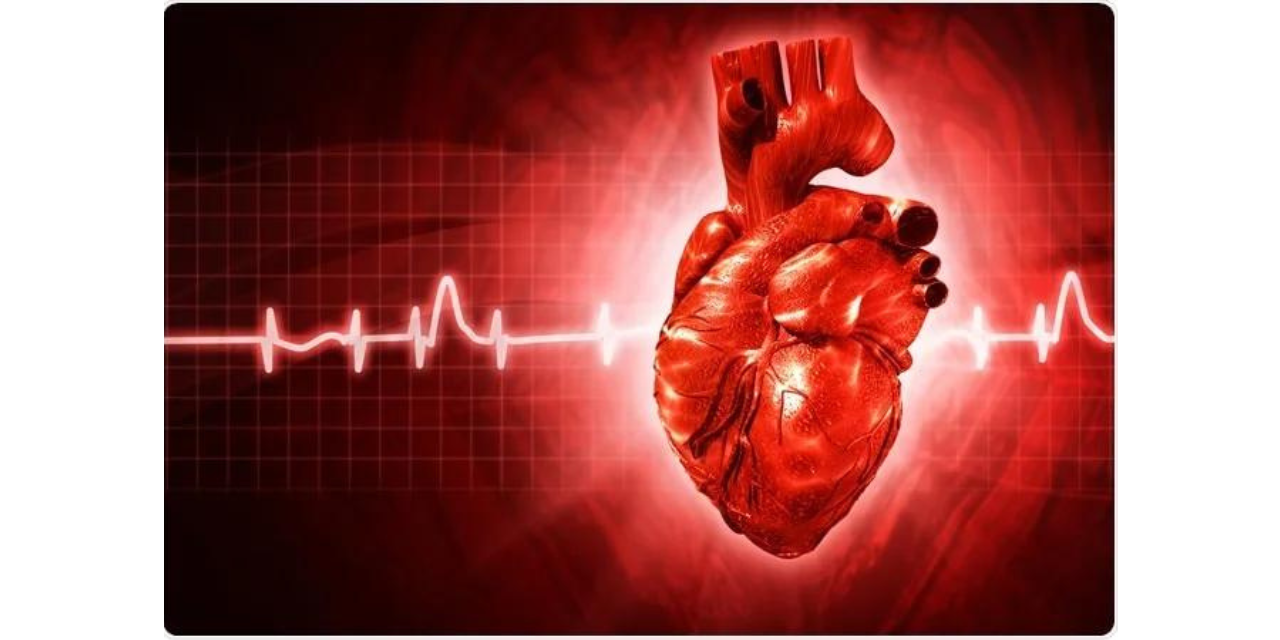

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic:**

     Sex: male or female("M" or "F")

     Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

     is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

     Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

     BP Meds: whether or not the patient was on blood pressure medication (Nominal)

     Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

     Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

     Diabetes: whether or not the patient had diabetes (Nominal)

**Medical**(current)

     Tot Chol: total cholesterol level (Continuous)

     Sys BP: systolic blood pressure (Continuous)

     Dia BP: diastolic blood pressure (Continuous)

     BMI: Body Mass Index (Continuous)

     Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in  fact discrete, yet are considered continuous because of large number of possible values.)

     Glucose: glucose level (Continuous)Predict variable (desired target)

     10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -

**Data Loading**

In [65]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#Reading Files
path='/content/drive/MyDrive/CAPSTONE_PROJECT-3/data_cardiovascular_risk.csv'
df=pd.read_csv(path)

***FIRST VIEW!***

In [68]:
df.head() #First Look of dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**DATASET DESCRIPTION**

In [69]:
df.shape

(3390, 17)

Number of Columns are :17

Number of Rows are    :3390

In [70]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

It can be seen that there are 6 columns datatype integers,9 of Float, and 2 of string.

In [72]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [73]:
#Checking Null Values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

6 columns are having null values in which education has maximum of 84 null values.

In [74]:
null_percent=(df.isnull().sum()/len(df))*100
null_percent

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [75]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING**

In [76]:
#classifying features into discrete and continuous
dis_fea=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
con_fea=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

***Analysis of Discrete Variables***

In [77]:
#Checking the values of different features.
for col in dis_fea:
  print(df[col].value_counts())

F    1923
M    1467
Name: sex, dtype: int64
NO     1703
YES    1687
Name: is_smoking, dtype: int64
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
0    3368
1      22
Name: prevalentStroke, dtype: int64
0    2321
1    1069
Name: prevalentHyp, dtype: int64
0    3303
1      87
Name: diabetes, dtype: int64
0    2879
1     511
Name: TenYearCHD, dtype: int64


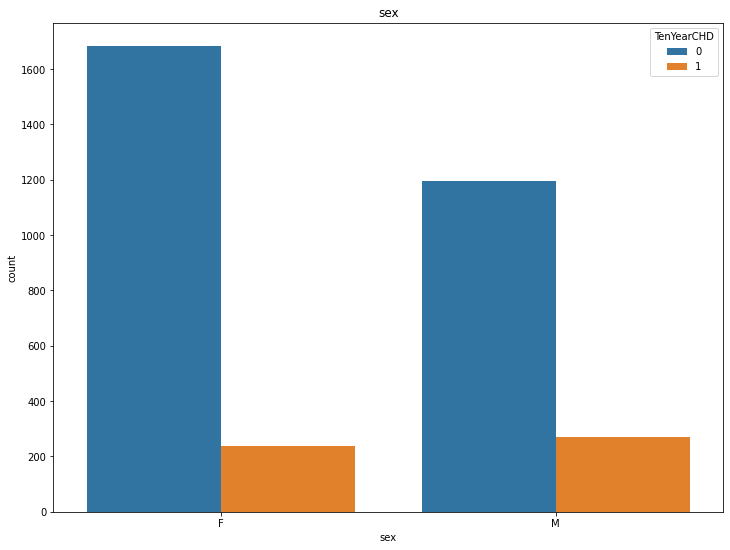

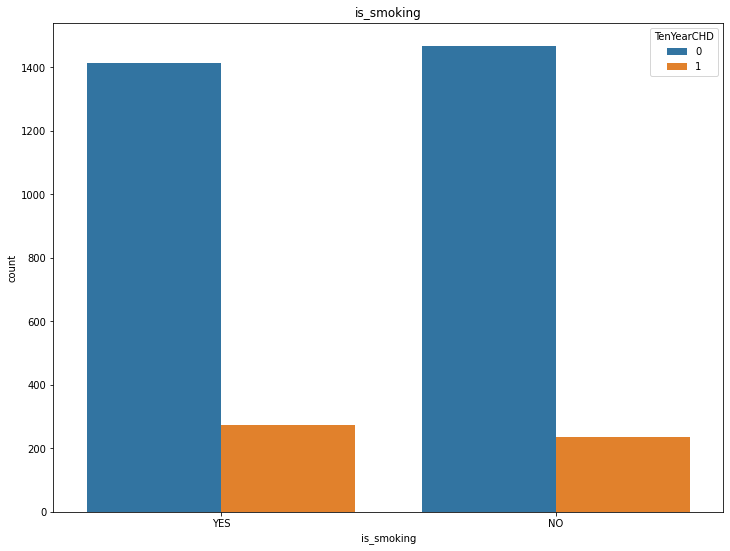

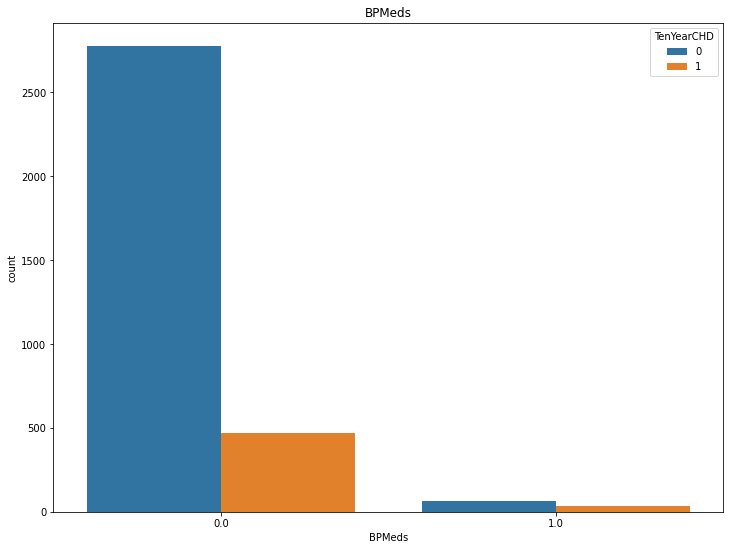

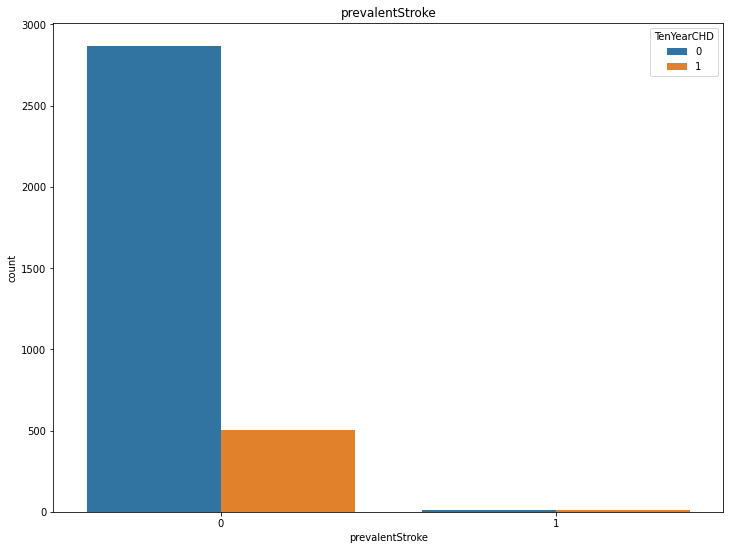

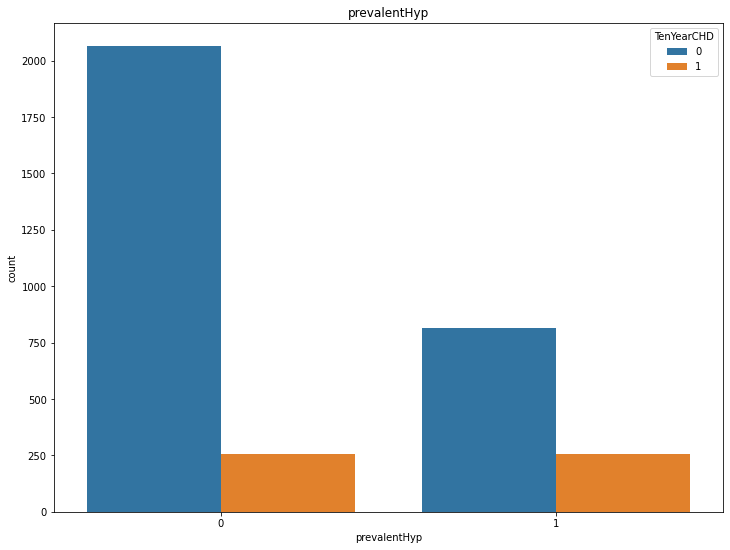

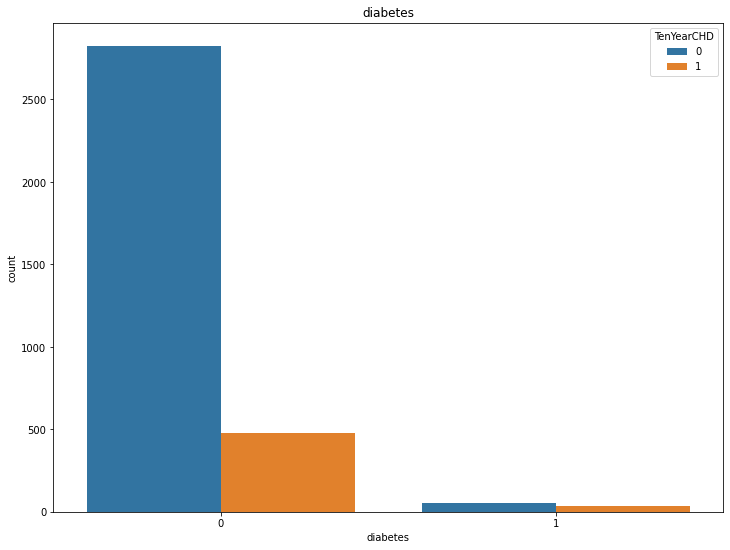

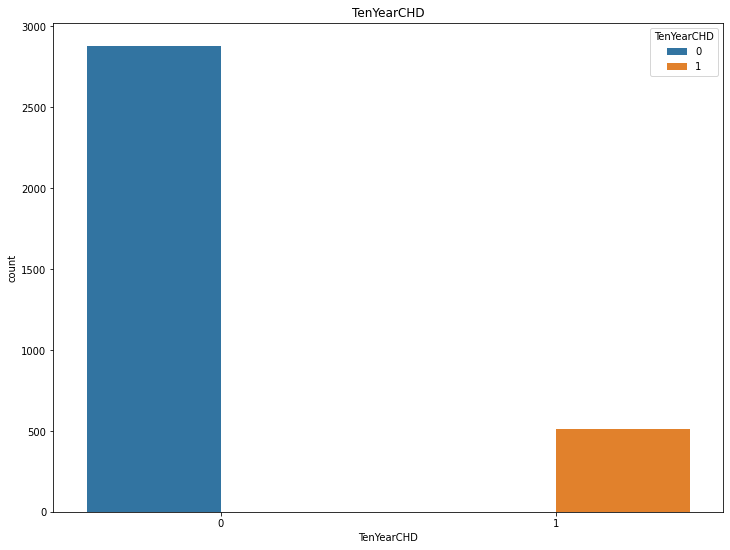

In [78]:
#Visualising the number of values of different features and its impact on Target Variables.
for col in dis_fea:
  fig=plt.figure(figsize=(12,9))
  ax=fig.gca()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'])
  ax.set_title(col)

Conclusion from above bar_chart-

    1-Male has higher percentage of Coronary Heart Disease(CHD).

    2-No major impact of Smoking,Medical BP,Prevalent Stroke on heart   disease.

    3-Having Hypertension,diabetes increase the chances of heart disease.

In [79]:
#dropping some of less relevant features
df.drop(['id','education','prevalentStroke','is_smoking','BPMeds'],axis=1,inplace=True) 

Since Id,education has nothing to do with Heart Disease,while other features have negligible impact on possibility of heart disease.

***Analysis of continuous variables***

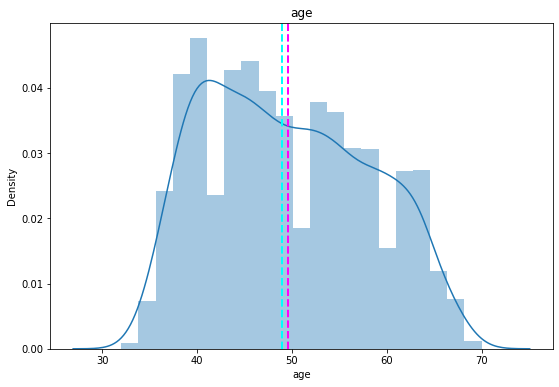

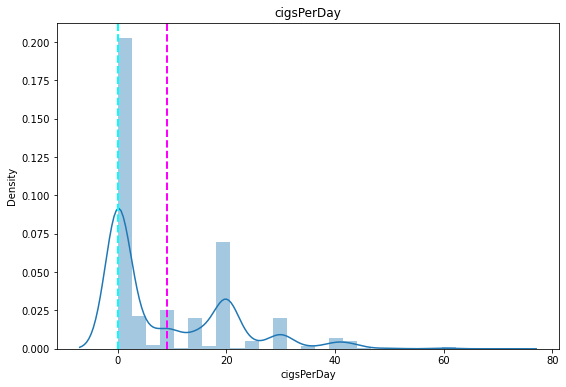

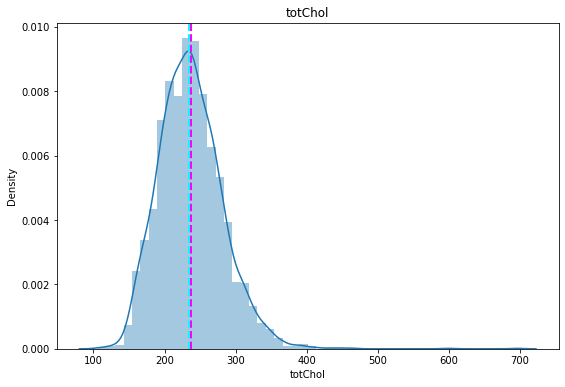

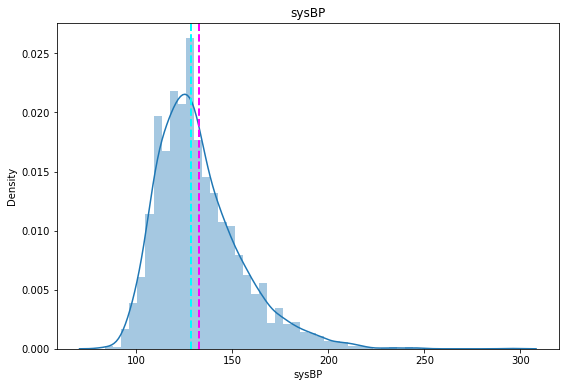

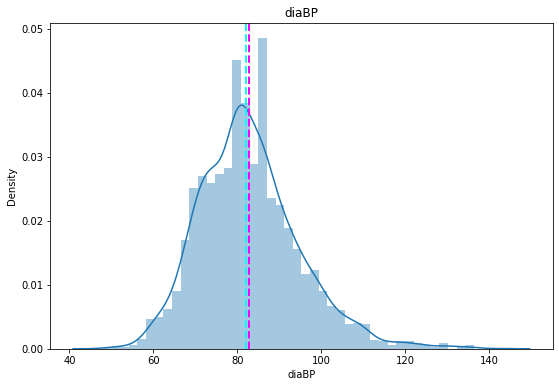

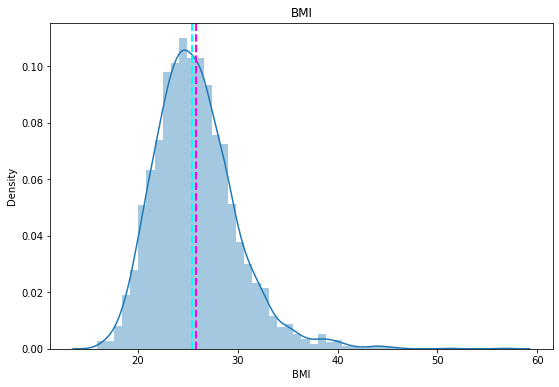

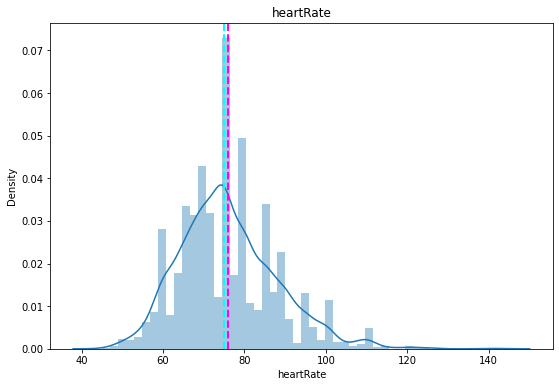

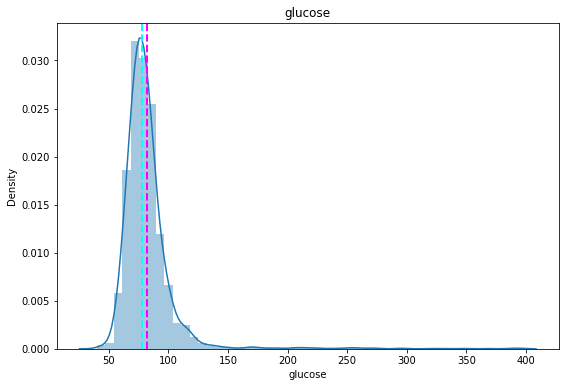

In [80]:
#Visualixing the density plot of continuous variable
for i,col in enumerate(con_fea):
  fig=plt.figure(figsize=[9,6])
  ax=fig.gca()
  sns.distplot(df[col],ax=ax)
  ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Variables are positively skewed due to the outliers which is needed to be remove to make distribution normal.

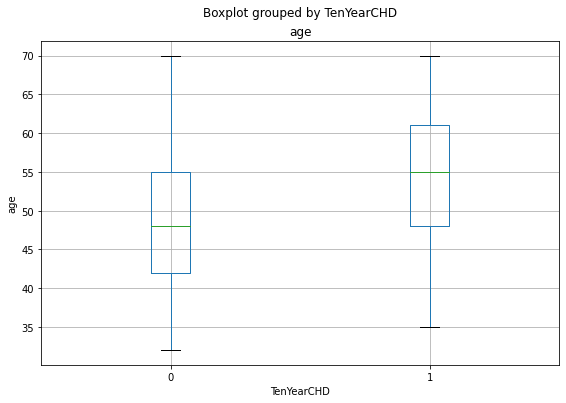

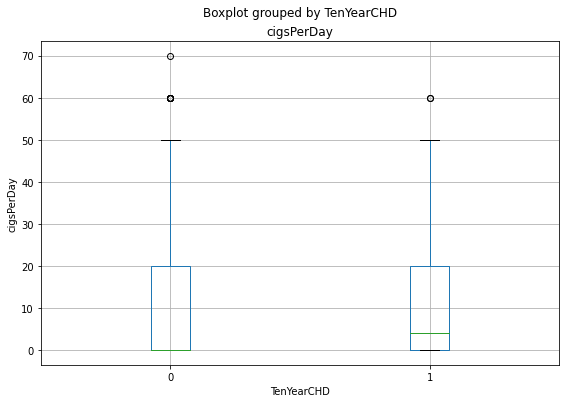

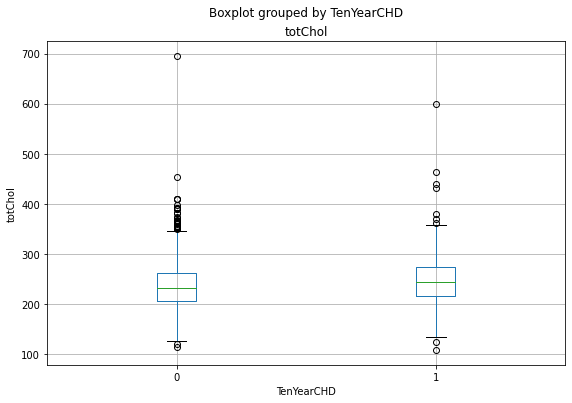

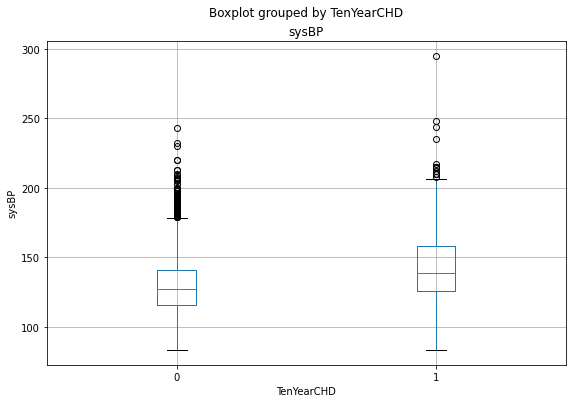

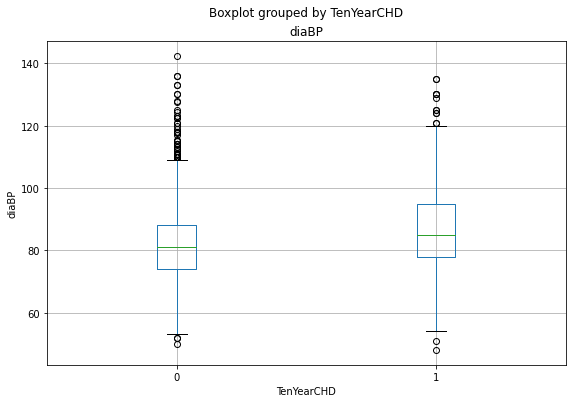

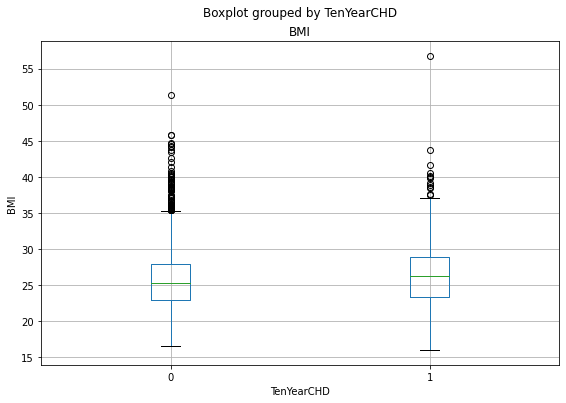

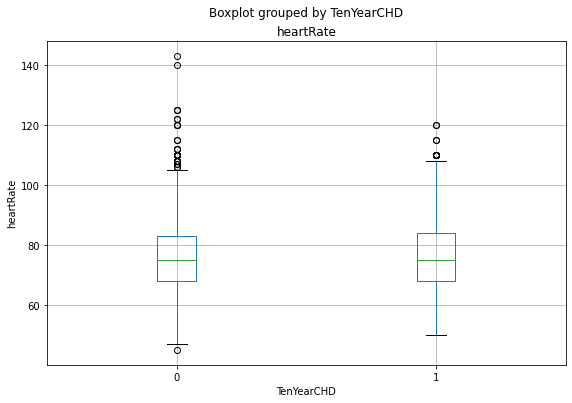

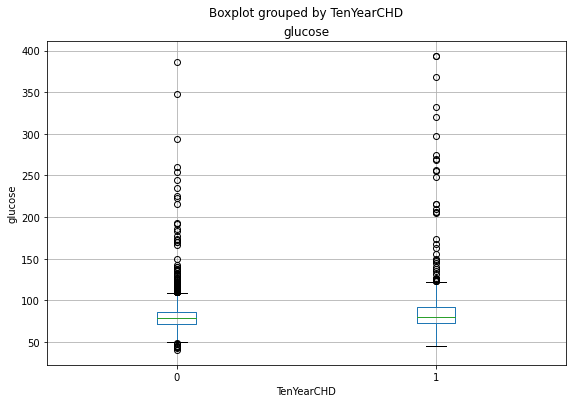

In [81]:
#Visualising boxplot to have a glance on outliers.
for col in con_fea:
 fig = plt.figure(figsize=(9, 6))
 ax = fig.gca()
 df.boxplot(column =col, by ='TenYearCHD',ax=ax)
 ax.set_ylabel(col)
plt.show()

From the above boxplot,we can seen that almost all variables posses outliers which needed to be treated.

It also can be seen that Number Cigerrate consumed per day has no major impact on the heart disease

In [82]:
df.drop('cigsPerDay',axis=1,inplace=True) #Removing that column

**DATA CLEANING**

In [83]:
#Treatment of outliers
df=df[df['totChol']<=400]
df=df[df['sysBP']<=200]
df=df[df['diaBP']<=125]
df=df[df['BMI']<=40]
df=df[df['heartRate']<=110]
df=df[df['glucose']<190]

In [84]:
con_fea=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose'] #updated Continuous Variables

In [85]:
df.shape

(2960, 11)

In [86]:
df.isnull().sum()#Checking null values

age             0
sex             0
prevalentHyp    0
diabetes        0
totChol         0
sysBP           0
diaBP           0
BMI             0
heartRate       0
glucose         0
TenYearCHD      0
dtype: int64

In [87]:
null_percent=(df.isnull().sum()/len(df))*100 #Checking percentage of null values
null_percent

age             0.0
sex             0.0
prevalentHyp    0.0
diabetes        0.0
totChol         0.0
sysBP           0.0
diaBP           0.0
BMI             0.0
heartRate       0.0
glucose         0.0
TenYearCHD      0.0
dtype: float64

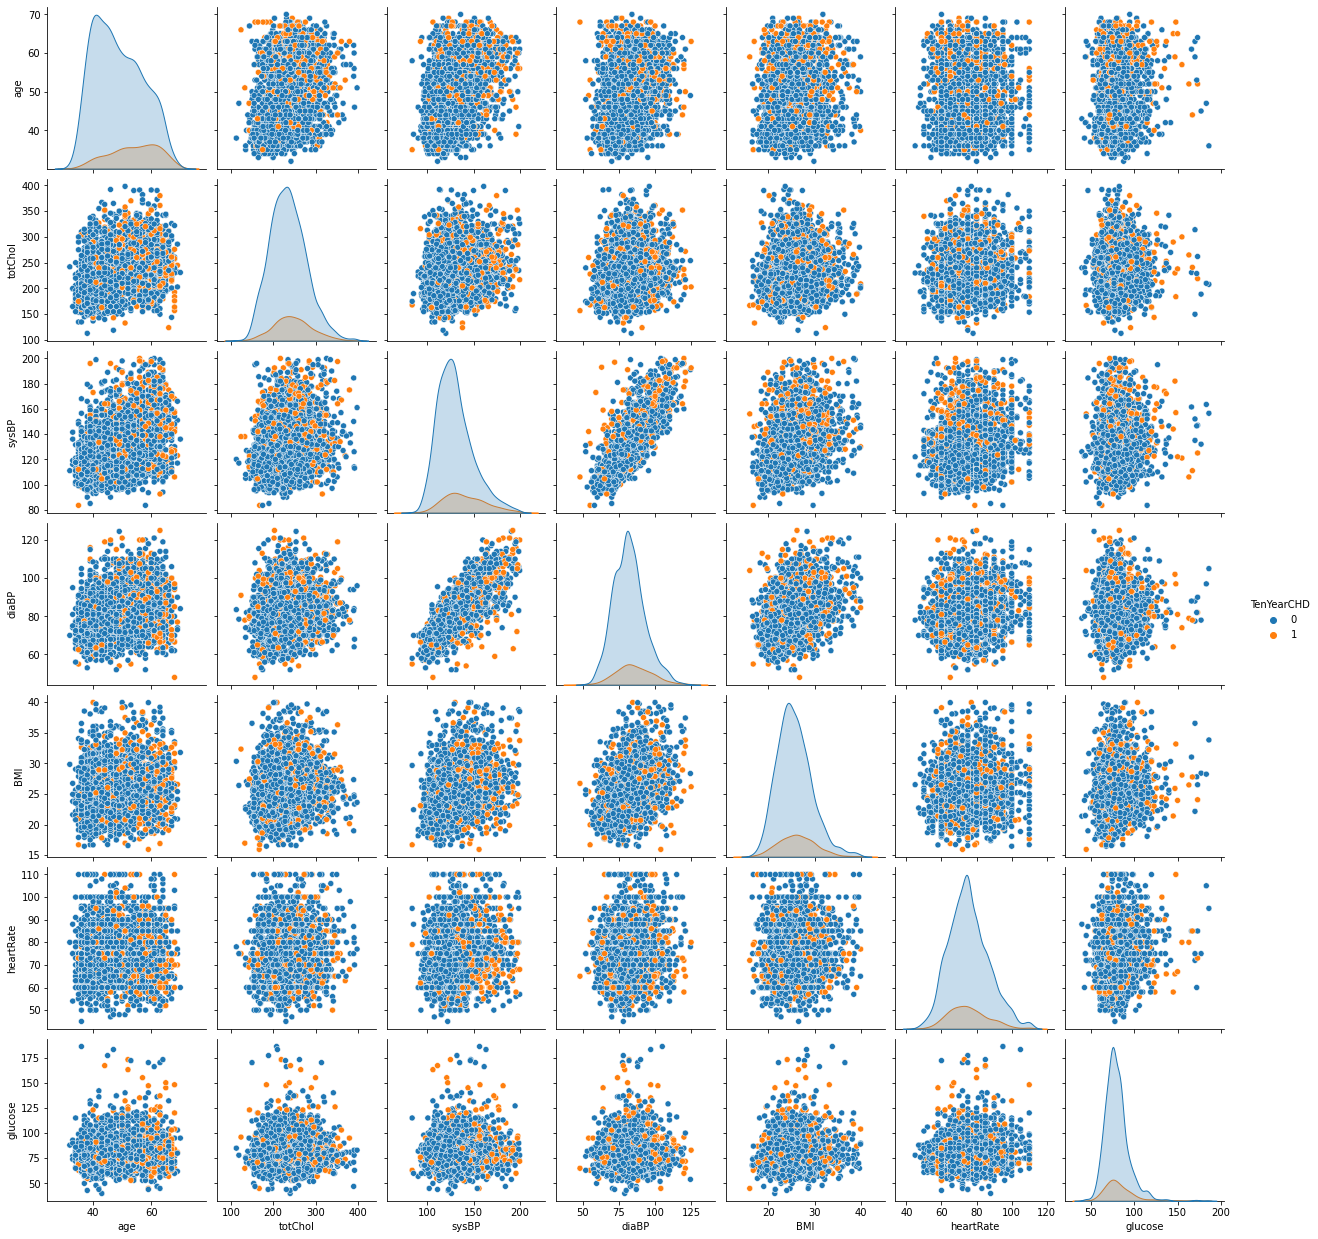

In [88]:
 #Visualising the correlation between different features
sns.pairplot(df,vars=con_fea,hue='TenYearCHD')

From the above pairplot it can be seen-

    1-DiaBP and sysBP has the linear relationship.
    2-Higher age having more level of colestrol,BP and more prone to heart disease.
    3-Higher colestrol level increase the chances of BP and heart disease.
    4-Higher BP increase the BMI and heart rate and furthe CHD.
    5-Glucose play also a positive relationship with increasing BP,heart disease and CHD.


**Checking Correlation**

In [89]:
#Checking correlation
df.corr()

,age,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,0.300566,0.100423,0.290011,0.396674,0.212066,0.130482,-0.008491,0.108798,0.218522
prevalentHyp,0.300566,1.000000,0.065290,0.155444,0.704383,0.606841,0.282079,0.129569,0.071502,0.143667
diabetes,0.100423,0.065290,1.000000,0.038698,0.078393,0.035357,0.068134,0.033922,0.352223,0.038299
totChol,0.290011,0.155444,0.038698,1.000000,0.218014,0.169905,0.126955,0.086089,0.031540,0.087907
sysBP,0.396674,0.704383,0.078393,0.218014,1.000000,0.765206,0.302409,0.157554,0.104725,0.183704
diaBP,0.212066,0.606841,0.035357,0.169905,0.765206,1.000000,0.363148,0.165684,0.048240,0.114264
BMI,0.130482,0.282079,0.068134,0.126955,0.302409,0.363148,1.000000,0.071762,0.088178,0.055430
heartRate,-0.008491,0.129569,0.033922,0.086089,0.157554,0.165684,0.071762,1.000000,0.097352,0.000863
glucose,0.108798,0.071502,0.352223,0.031540,0.104725,0.048240,0.088178,0.097352,1.000000,0.065511
TenYearCHD,0.218522,0.143667,0.038299,0.087907,0.183704,0.114264,0.055430,0.000863,0.065511,1.000000


In [90]:
df2=df.copy() #copying features to another variable to model prediction

In [91]:
df2.head()

,age,sex,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [92]:
df2.corr() #Basic correlations among different variables.

,age,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,0.300566,0.100423,0.290011,0.396674,0.212066,0.130482,-0.008491,0.108798,0.218522
prevalentHyp,0.300566,1.000000,0.065290,0.155444,0.704383,0.606841,0.282079,0.129569,0.071502,0.143667
diabetes,0.100423,0.065290,1.000000,0.038698,0.078393,0.035357,0.068134,0.033922,0.352223,0.038299
totChol,0.290011,0.155444,0.038698,1.000000,0.218014,0.169905,0.126955,0.086089,0.031540,0.087907
sysBP,0.396674,0.704383,0.078393,0.218014,1.000000,0.765206,0.302409,0.157554,0.104725,0.183704
diaBP,0.212066,0.606841,0.035357,0.169905,0.765206,1.000000,0.363148,0.165684,0.048240,0.114264
BMI,0.130482,0.282079,0.068134,0.126955,0.302409,0.363148,1.000000,0.071762,0.088178,0.055430
heartRate,-0.008491,0.129569,0.033922,0.086089,0.157554,0.165684,0.071762,1.000000,0.097352,0.000863
glucose,0.108798,0.071502,0.352223,0.031540,0.104725,0.048240,0.088178,0.097352,1.000000,0.065511
TenYearCHD,0.218522,0.143667,0.038299,0.087907,0.183704,0.114264,0.055430,0.000863,0.065511,1.000000


<Axes: >

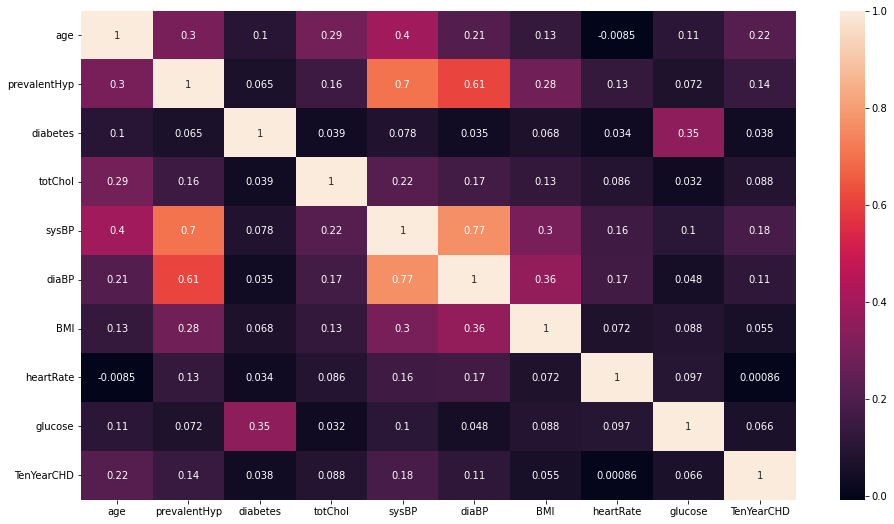

In [93]:
#Visualizing the correlation on heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),annot=True)

From the heatmap we can see that SysBP and diaBP are highly correlated as well as SysBP is also highly correlated with prevalentHypertension.

In [94]:
df2.drop('sysBP',axis=1,inplace=True) #Droping SysBP due to its high correlation with diaBP and hypertension

<Axes: >

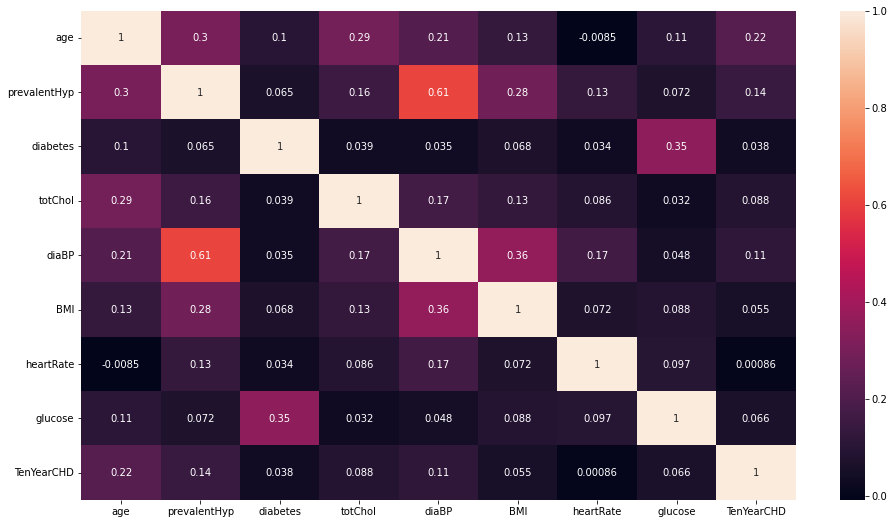

In [95]:
#Lets again visualize correlation on heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),annot=True)

In [96]:
df2.head()

,age,sex,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,1,0,212.0,98.0,29.77,72.0,75.0,0
2,46,F,0,0,250.0,71.0,20.35,88.0,94.0,0
3,50,M,1,0,233.0,88.0,28.26,68.0,94.0,1
4,64,F,0,0,241.0,85.0,26.42,70.0,77.0,0
5,61,F,1,0,272.0,121.0,32.80,85.0,65.0,1


In [97]:
df2=pd.get_dummies(df2,drop_first=False) #Label Encoding of categorical Variables

Here we have only one relevant categorical variables remaining that is Sex which needed to be encoding for numerical procession.

In [98]:
df2.head()

,age,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
1,36,1,0,212.0,98.0,29.77,72.0,75.0,0,0,1
2,46,0,0,250.0,71.0,20.35,88.0,94.0,0,1,0
3,50,1,0,233.0,88.0,28.26,68.0,94.0,1,0,1
4,64,0,0,241.0,85.0,26.42,70.0,77.0,0,1,0
5,61,1,0,272.0,121.0,32.80,85.0,65.0,1,1,0


In [99]:
df2.shape

(2960, 11)

In [100]:
#Changing position of target variable to the last columns.
first_col=df2.pop('TenYearCHD')
df2.insert(10, 'TenYearCHD', first_col)
display(df2)

,age,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,sex_F,sex_M,TenYearCHD
1,36,1,0,212.0,98.0,29.77,72.0,75.0,0,1,0
2,46,0,0,250.0,71.0,20.35,88.0,94.0,1,0,0
3,50,1,0,233.0,88.0,28.26,68.0,94.0,0,1,1
4,64,0,0,241.0,85.0,26.42,70.0,77.0,1,0,0
5,61,1,0,272.0,121.0,32.80,85.0,65.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,261.0,79.0,29.28,70.0,103.0,1,0,0
3386,46,0,0,199.0,56.0,21.96,80.0,84.0,1,0,0
3387,44,1,0,352.0,119.0,28.92,73.0,72.0,0,1,1
3388,60,1,0,191.0,105.0,23.01,80.0,85.0,0,1,0


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 1 to 3389
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2960 non-null   int64  
 1   prevalentHyp  2960 non-null   int64  
 2   diabetes      2960 non-null   int64  
 3   totChol       2960 non-null   float64
 4   diaBP         2960 non-null   float64
 5   BMI           2960 non-null   float64
 6   heartRate     2960 non-null   float64
 7   glucose       2960 non-null   float64
 8   sex_F         2960 non-null   uint8  
 9   sex_M         2960 non-null   uint8  
 10  TenYearCHD    2960 non-null   int64  
dtypes: float64(5), int64(4), uint8(2)
memory usage: 237.0 KB


In [102]:
df2.TenYearCHD.value_counts() #value count of target variable.

0    2540
1     420
Name: TenYearCHD, dtype: int64

Text(0, 0.5, 'Number of Values')

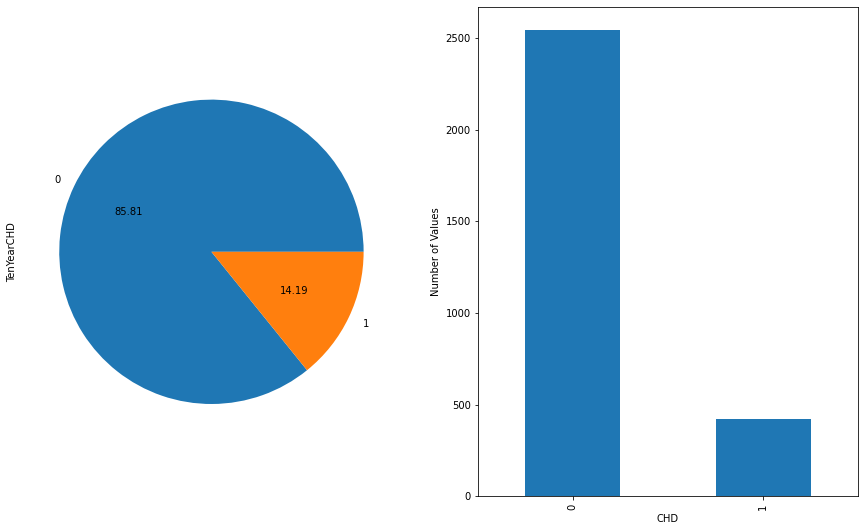

In [103]:
plt.figure(figsize=(15,9))

plt.subplot(1,2,1)
df2['TenYearCHD'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(1,2,2)
df2['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('CHD')
plt.ylabel('Number of Values')

From the above chart we can see that target variable is highly unbalanced which required to be treated to make it more accurate and able to predict even minority class efficiently.

**Defining dependent and dependent variables.**

In [104]:
y=df2.iloc[:,-1] #target variable(dependent)

In [105]:
x=df2.iloc[:,:-1] #independent variables

In [106]:
x.shape

(2960, 10)

In [107]:
y.shape

(2960,)

TO tackle the **unbalanced target** variables,we are over_sampling with the help of **SMOTE**.

In [108]:
from imblearn.over_sampling import SMOTE #Importing the SMOTE

In [109]:
#Implementation of SMOTE
smote=SMOTE()
x_sm,y_sm=smote.fit_resample(x,y)
print('original dataset shape',len(df2))
print('resampled dataset shape',len(y_sm))

original dataset shape 2960
resampled dataset shape 5080


In [110]:
y_sm.value_counts()

0    2540
1    2540
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'After oversampling')

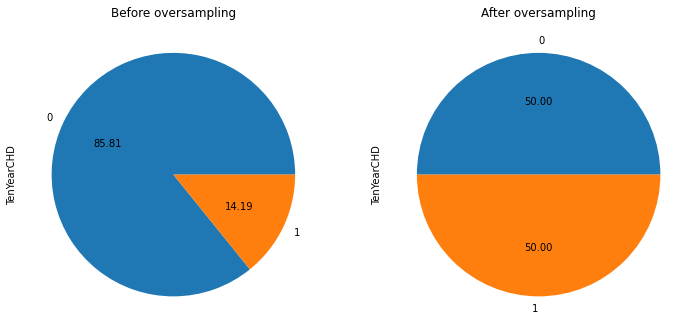

In [111]:
plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
y.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Before oversampling')
plt.subplot(1,2,2)
y_sm.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('After oversampling')

Splitting the data into train and test set

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [113]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0) #Splitting the oversampled data.

# Model-1-Logistice Regression

In [114]:
from sklearn.linear_model import LogisticRegression #Importing model

**Implementation**

In [115]:
clf=LogisticRegression(fit_intercept=True,max_iter=10000) #Implementing the model

In [116]:
clf.fit(x_train,y_train) #fitting the model

LogisticRegression(max_iter=10000)

In [117]:
clf.intercept_ #Intercept

array([-8.29229487])

In [118]:
clf.coef_ #Coeficient 

array([[ 0.0653197 ,  0.33181341, -0.02487619,  0.00456552,  0.00933417,
         0.01030011,  0.00268348,  0.00795115, -0.37230606,  0.38049346]])

In [119]:
#Probability prediction
train_pred=clf.predict_proba(x_train)
test_pred=clf.predict_proba(x_test)

In [120]:
train_pred[:,1] #Prediction of probability of occurence train data  

array([0.07988138, 0.1062839 , 0.29281084, ..., 0.18774025, 0.12116384,
       0.02487355])

In [121]:
test_pred[:,1] #Prediction of probability of occurence test data

array([0.06954902, 0.08694458, 0.1333695 , 0.02621536, 0.1076217 ,
       0.07122672, 0.23913351, 0.25571806, 0.18343629, 0.02049643,
       0.37762407, 0.15692922, 0.21046795, 0.05891339, 0.10359759,
       0.0832038 , 0.08495213, 0.04237964, 0.28059935, 0.189012  ,
       0.18903595, 0.07705017, 0.11363073, 0.11839504, 0.05527794,
       0.04609417, 0.10357045, 0.03235589, 0.03486004, 0.31171256,
       0.05357133, 0.12116806, 0.03322237, 0.17832651, 0.14422352,
       0.13116338, 0.28148533, 0.14537368, 0.17080765, 0.0675936 ,
       0.03665844, 0.21472459, 0.16132601, 0.15139992, 0.27355591,
       0.06371201, 0.06225468, 0.11571331, 0.05453203, 0.15693283,
       0.13779731, 0.10635494, 0.02459855, 0.1737945 , 0.21664567,
       0.31100306, 0.02613752, 0.25400088, 0.08008501, 0.22059053,
       0.11817822, 0.02175933, 0.1666088 , 0.15382942, 0.09612535,
       0.06414984, 0.21756438, 0.06541046, 0.03117919, 0.34813179,
       0.40611442, 0.03316609, 0.0672621 , 0.15418446, 0.09149

**Model Prediction**

In [122]:
train_class_pred=clf.predict(x_train) #prediction on train data
train_class_pred

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
test_class_pred=clf.predict(x_test) #predictin on test data
test_class_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
clf.score(x_train,y_train) #accuracy score

0.859375

**Evaluation**

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,roc_auc_score,recall_score

In [126]:
clf_train_accuracy=accuracy_score(train_class_pred,y_train) #Accuracy of train data
clf_train_accuracy

0.859375

In [127]:
clf_test_accuracy=accuracy_score(test_class_pred,y_test) #Accuracy of test data
clf_test_accuracy

0.856418918918919

Here the accuracy score are 0.86 for train data, while 0.85 for test data.

Since the target variables are unbalance,this is likely to get high accuracy.

In [128]:
#Classification Report
print(classification_report(y_train,train_class_pred)) 


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2032
           1       1.00      0.01      0.02       336

    accuracy                           0.86      2368
   macro avg       0.93      0.50      0.47      2368
weighted avg       0.88      0.86      0.80      2368



Here we can see the low macro avg of accuracy of f1-score as 0.47 which is not desirable.

In [129]:
#ROC_AUC_SCORE for train data.
print(roc_auc_score(y_train,train_class_pred))

0.5044642857142857


Roc_auc_score is very low for train data which shows the inability of the model to capture true values.

In [130]:
#ROC_AUC_SCORE for test data.
print(roc_auc_score(y_test,test_class_pred))

0.49901574803149606


Roc_auc_score of test data is even lower to 0.49 which shows that model is not working well on unbalanced data set.

In [131]:
recall_lr_tr=recall_score(y_train,train_class_pred)
recall_lr_tr

0.008928571428571428

In [132]:
recall_lr_ts=recall_score(y_test,test_class_pred)
recall_lr_ts

0.0

**SMOTE**

Now we ll try this model on Balanced data set.

In [133]:
clf.fit(x_train_sm,y_train_sm) #Fitting the model

LogisticRegression(max_iter=10000)

In [134]:
clf.intercept_ #intercept

array([-2.82740571])

In [135]:
clf.coef_ #Coeficient of Parameters

array([[ 7.23682525e-02, -5.01942680e-01, -6.10813774e-01,
         3.78315865e-03,  2.46716220e-02,  4.70756948e-03,
         1.69771232e-03,  4.52079543e-03, -5.20102011e+00,
        -4.37000573e+00]])

In [136]:
#Prediction on balanced dataset
train_class_pred_sm=clf.predict(x_train_sm) 
test_class_pred_sm=clf.predict(x_test_sm)

**Evaluation**

In [137]:
#Accuracy on train data
sm_train_acc=accuracy_score(y_train_sm,train_class_pred_sm)
sm_train_acc

0.734498031496063

In [138]:
#Accuracy on test data
sm_test_acc=accuracy_score(y_test_sm,test_class_pred_sm)
sm_test_acc

0.7234251968503937

Accuracy has been lower than balanced data set on this model.

In [139]:
#Classification report
print('for train\n',classification_report(y_train_sm,train_class_pred_sm))
print('for test\n',classification_report(y_test_sm,test_class_pred_sm))


for train
               precision    recall  f1-score   support

           0       0.70      0.82      0.76      2053
           1       0.78      0.65      0.71      2011

    accuracy                           0.73      4064
   macro avg       0.74      0.73      0.73      4064
weighted avg       0.74      0.73      0.73      4064

for test
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       487
           1       0.79      0.64      0.71       529

    accuracy                           0.72      1016
   macro avg       0.73      0.73      0.72      1016
weighted avg       0.73      0.72      0.72      1016



Here there is a recall of 0.74 lower than the unbalanced data.
While f1-score accuracy is nearly 0.74 which has been improved.

In [140]:
#ROC_AUC_SCORE on balanced dataset
print('roc_auc_score for train : ',roc_auc_score(y_train_sm,train_class_pred_sm))
print('roc_auc_score for test : ',roc_auc_score(y_test_sm,test_class_pred_sm))

roc_auc_score for train :  0.7335871653785331
roc_auc_score for test :  0.7268236919840233


Quit interestengly we can see that roc_auc_score with nearly 0.74 is higher than the unbalanced dataset.

This shows that balanced dataset giving  better result.

In [141]:
recall_lr_tr_sm=recall_score(y_train_sm,train_class_pred_sm)
recall_lr_tr_sm

0.6454500248632521

In [142]:
recall_lr_ts_sm=recall_score(y_test_sm,test_class_pred_sm)
recall_lr_ts_sm

0.6446124763705104

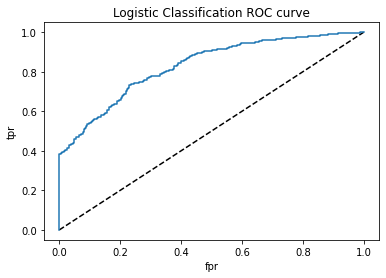

In [143]:
clf_test_pred_proba_sm = clf.predict_proba(x_test_sm)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_sm, clf_test_pred_proba_sm)
#Plotting ROC curve.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Classification')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Classification ROC curve')
plt.show()

# MODEL-2-RANDOM FOREST CLASSIFIER

In [144]:
from sklearn.ensemble import RandomForestClassifier #importing model
from sklearn.model_selection import GridSearchCV

In [145]:
y_train.value_counts()

0    2032
1     336
Name: TenYearCHD, dtype: int64

In [146]:
y_test.value_counts()

0    508
1     84
Name: TenYearCHD, dtype: int64

In [147]:
x_train.shape

(2368, 10)

In [148]:
x_test.shape

(592, 10)

**Implementation**

In [149]:
from pandas.core.groupby.categorical import recode_from_groupby
rf_model=RandomForestClassifier() 
grid_values={'n_estimators':[50,80,100],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50],
             'max_depth':[3,5,7],}
rf_grid=GridSearchCV(rf_model,param_grid=grid_values,scoring='roc_auc',cv=5,verbose=2) #tuning
rf_grid.fit(x_train,y_train) #fitting the model

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [150]:
rf_grid.best_estimator_ #estimator

RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=80)

In [151]:
rf_optimal_model=rf_grid.best_estimator_

In [152]:
#model prediction
rf_train_pred=rf_optimal_model.predict(x_train) #train data
rf_test_pred=rf_optimal_model.predict(x_test)   #test data

***Evaluation***

In [153]:
print('accuracy_score of train data : ',accuracy_score(y_train,rf_train_pred))
print('accuracy_score of test data : ',accuracy_score(y_test,rf_test_pred))

accuracy_score of train data :  0.8581081081081081
accuracy_score of test data :  0.8581081081081081


Accuracy is nearly 85%.

In [154]:
print('roc_auc_score of train data : ',roc_auc_score(y_train,rf_train_pred))
print('roc_auc_score of test data : ',roc_auc_score(y_test,rf_test_pred))

roc_auc_score of train data :  0.5
roc_auc_score of test data :  0.5


ROC_AUC_SCORE is nearly 0.5 which is very less.

In [155]:
print('confusion_matrix of train data :\n ',confusion_matrix(y_train,rf_train_pred))
print('confusion_matrix of test data :\n ',confusion_matrix(y_test,rf_test_pred))

confusion_matrix of train data :
  [[2032    0]
 [ 336    0]]
confusion_matrix of test data :
  [[508   0]
 [ 84   0]]


In [156]:
recall_rf_tr=recall_score(y_train,rf_train_pred)
recall_rf_tr

0.0

In [157]:
recall_rf_ts=recall_score(y_test,rf_test_pred)
recall_rf_ts

0.0

**SMOTE(Balancing the data)**

In [158]:
rf_model_sm=RandomForestClassifier() #Applying model on balanced data
rf_grid_sm=GridSearchCV(rf_model_sm,param_grid=grid_values,scoring='roc_auc',cv=5,verbose=2) #Tuning
rf_grid_sm.fit(x_train_sm,y_train_sm) #Fitting the model

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [159]:
rf_grid_sm.best_estimator_ #estimator

RandomForestClassifier(max_depth=7, min_samples_leaf=40, min_samples_split=50)

In [160]:
sm_rf_optimal_model=rf_grid_sm.best_estimator_

In [161]:
#model prediction
rf_train_pred_sm=sm_rf_optimal_model.predict(x_train_sm) #on train data
rf_test_pred_sm=sm_rf_optimal_model.predict(x_test_sm)  #on test data

***Evaluation***

In [162]:
print('accuracy_score of train data : ',accuracy_score(y_train_sm,rf_train_pred_sm))
print('accuracy_score of test data : ',accuracy_score(y_test_sm,rf_test_pred_sm))

accuracy_score of train data :  0.7903543307086615
accuracy_score of test data :  0.7667322834645669


Accuracy is nearly 79% which is lower than unbalanced data.

In [163]:
print('roc_auc_score of train data : ',roc_auc_score(y_train_sm,rf_train_pred_sm))
print('roc_auc_score of test data : ',roc_auc_score(y_test_sm,rf_test_pred_sm))

roc_auc_score of train data :  0.7899911422393591
roc_auc_score of test data :  0.7677594779969179


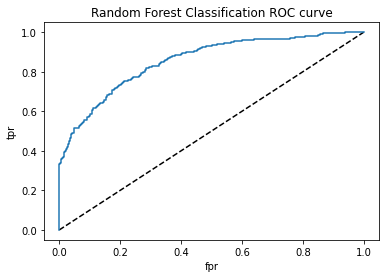

In [164]:
rf_test_pred_proba_sm = sm_rf_optimal_model.predict_proba(x_test_sm)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_sm, rf_test_pred_proba_sm)
#Plotting ROC curve.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest Classification')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest Classification ROC curve')
plt.show()

ROC_AUC_SCORE is higher as compared to unbalanced data as well as logistic Regression model(0.74).

In [165]:
print('for train\n',classification_report(y_train_sm,rf_train_pred_sm))
print('for test\n',classification_report(y_test_sm,rf_test_pred_sm))

for train
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      2053
           1       0.81      0.75      0.78      2011

    accuracy                           0.79      4064
   macro avg       0.79      0.79      0.79      4064
weighted avg       0.79      0.79      0.79      4064

for test
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       487
           1       0.80      0.74      0.77       529

    accuracy                           0.77      1016
   macro avg       0.77      0.77      0.77      1016
weighted avg       0.77      0.77      0.77      1016



Average accuracy of the f1-score is nearly 75% which is quite good.

In [166]:
recall_rf_tr_sm=recall_score(y_train_sm,rf_train_pred_sm)
recall_rf_tr_sm

0.7548483341621084

In [167]:
recall_rf_ts_sm=recall_score(y_test_sm,rf_test_pred_sm)
recall_rf_ts_sm

0.7429111531190926

**Important Features**

In [168]:
importance=sm_rf_optimal_model.feature_importances_ #Analysing the important features.

In [169]:
importance

array([0.23387463, 0.00840766, 0.        , 0.0771102 , 0.0712812 ,
       0.04167568, 0.05711545, 0.0493098 , 0.278784  , 0.18244137])

In [170]:
importance_dict={'Feature':list(x.columns),
                 'Importance':importance}

In [171]:
sm_rf_importance_df=pd.DataFrame(importance_dict)

In [172]:
sm_rf_importance_df.head()

,Feature,Importance
0,age,0.233875
1,prevalentHyp,0.008408
2,diabetes,0.000000
3,totChol,0.077110
4,diaBP,0.071281


In [173]:
sm_rf_importance_df.sort_values(by='Importance',ascending=False).reset_index()

,index,Feature,Importance
0,8,sex_F,0.278784
1,0,age,0.233875
2,9,sex_M,0.182441
3,3,totChol,0.077110
4,4,diaBP,0.071281
5,6,heartRate,0.057115
6,7,glucose,0.049310
7,5,BMI,0.041676
8,1,prevalentHyp,0.008408
9,2,diabetes,0.000000


Here we can see that sex,age are the most important features which affecting the result of the diagnosis.

# MODEL-3-XGBOOST

**Implementation**

In [174]:
from xgboost import XGBClassifier

In [175]:
n_estimators = list(np.arange(40,50,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(3,5,1,dtype='int64'))

# learning rate
learning_rate=[0.28,0.26,0.27]

# min childs weight
min_child_weight=list(np.linspace(1,5,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
params = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}
     

In [176]:
from xgboost.sklearn import XGBRFClassifier #Importing the model

xgb_model=XGBRFClassifier(random_state=0,n_jobs=-1) #Assigning the model

In [177]:
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = params,cv = 5,scoring='roc_auc',n_jobs=-1) #Hypertunning
xgb_grid.fit(x_train,y_train) #fitting the model

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       n_estimators=100, n_jobs=-1,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=0,
                                       reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                                   1, 1, 1, 1, 2],
                         'learning_rate': [0.28, 0.26, 0.27],
                         'max_depth': [3, 4], 'min_child_weight': [1],
                         'n_estimators': [40, 42, 44, 46, 48],
                         'subsample': [0.3, 0.5, 0.6]},
             scoring='roc_auc')

In [178]:
print(xgb_grid.best_params_) #best_parameter

{'gamma': 0, 'learning_rate': 0.28, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 46, 'subsample': 0.6}


In [179]:
#Model Prediction
xg_train_pred=xgb_grid.predict(x_train) #For train data
xg_test_pred=xgb_grid.predict(x_test) #For test data

In [180]:
print('accuracy_score of train data : ',accuracy_score(y_train,xg_train_pred))
print('accuracy_score of test data : ',accuracy_score(y_test,xg_test_pred))

accuracy_score of train data :  0.8614864864864865
accuracy_score of test data :  0.8581081081081081


Accuracy of unbalanced data of this model is nearly 85-86%.

In [181]:
print('roc_auc_score of train data : ',roc_auc_score(y_train,xg_train_pred))
print('roc_auc_score of test data : ',roc_auc_score(y_test,xg_test_pred))

roc_auc_score of train data :  0.5131467941507311
roc_auc_score of test data :  0.5


ROC_AUC_SCORE of unbalanced data is similar to other models nearly 0.5.

In [182]:
print('classifiction report of train data : \n',classification_report(y_train,xg_train_pred))
print('classification report of test data : \n',classification_report(y_test,xg_test_pred))

classifiction report of train data : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      2032
           1       0.90      0.03      0.05       336

    accuracy                           0.86      2368
   macro avg       0.88      0.51      0.49      2368
weighted avg       0.87      0.86      0.80      2368

classification report of test data : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       508
           1       0.00      0.00      0.00        84

    accuracy                           0.86       592
   macro avg       0.43      0.50      0.46       592
weighted avg       0.74      0.86      0.79       592



Average accuracy for f1-score is 0.46 which is very low.

In [183]:
recall_xg_tr=recall_score(y_train,xg_train_pred)
recall_xg_tr

0.026785714285714284

In [184]:
recall_xg_ts=recall_score(y_test,xg_test_pred)
recall_xg_ts

0.0

**SMOTE**

In [185]:
xgb_model_sm=XGBRFClassifier(random_state=0,n_jobs=-1) #Applying model on balanced data

In [186]:
xgb_grid_sm = GridSearchCV(estimator=xgb_model_sm,param_grid = params,cv = 5,scoring='roc_auc',n_jobs=-1)
xgb_grid_sm.fit(x_train_sm,y_train_sm) #Fitting the model

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       n_estimators=100, n_jobs=-1,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=0,
                                       reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                                   1, 1, 1, 1, 2],
                         'learning_rate': [0.28, 0.26, 0.27],
                         'max_depth': [3, 4], 'min_child_weight': [1],
                         'n_estimators': [40, 42, 44, 46, 48],
                         'subsample': [0.3, 0.5, 0.6]},
             scoring='roc_auc')

In [ ]:
print(xgb_grid_sm.best_params_) #best_parameters

In [ ]:
#prediction
xg_train_pred_sm=xgb_grid_sm.predict(x_train_sm) #for train data
xg_test_pred_sm=xgb_grid_sm.predict(x_test_sm) #for test data

***Evaluation***

In [ ]:
print('accuracy_score of train data : ',accuracy_score(y_train_sm,xg_train_pred_sm))
print('accuracy_score of test data : ',accuracy_score(y_test_sm,xg_test_pred_sm))

Here we get accuracy of nearly 74%.

In [ ]:
print('roc_auc_score of train data : ',roc_auc_score(y_train_sm,xg_train_pred_sm))
print('roc_auc_score of test data : ',roc_auc_score(y_test_sm,xg_test_pred_sm))

ROC_AUC_SCORE is the nearly 0.74 which is similar to Random Forest Classifiers.

In [ ]:
xgb_test_pred_proba_sm = xgb_grid_sm.predict_proba(x_test_sm)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_sm, xgb_test_pred_proba_sm)
#Plotting ROC curve.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost Classification')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost Classification ROC curve')
plt.show()

In [ ]:
print('classifiction report of train data : \n',classification_report(y_train_sm,xg_train_pred_sm))
print('classification report of test data : \n',classification_report(y_test_sm,xg_test_pred_sm))

Here average accuracy of f1-score is nearly 0.73 bit lesser than Random Forest Classifier(0.75).

In [ ]:
recall_xg_tr_sm=recall_score(y_train_sm,xg_train_pred_sm)
recall_xg_tr_sm

In [ ]:
recall_xg_ts_sm=recall_score(y_test_sm,xg_test_pred_sm)
recall_xg_ts_sm

***Feature importance***

In [ ]:
xgb_optimal_model=xgb_grid_sm.best_estimator_

In [196]:
xg_importance=xgb_optimal_model.feature_importances_

In [197]:
importance_dict={'Feature':list(x.columns),
                 'Importance':xg_importance}

In [198]:
sm_xg_importance_df=pd.DataFrame(importance_dict)

In [199]:
sm_xg_importance_df=sm_xg_importance_df.sort_values(by='Importance',ascending=False).reset_index()

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

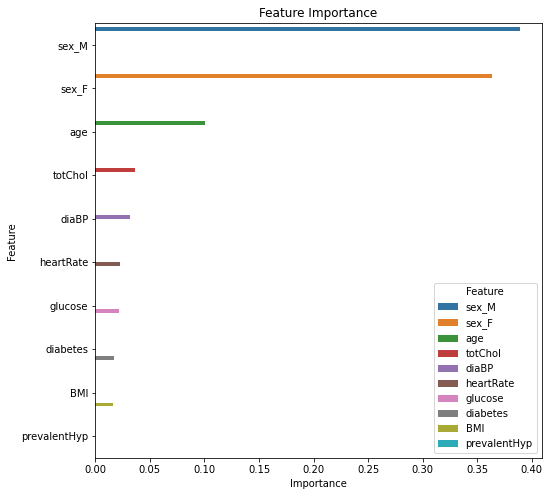

In [200]:
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.barplot(data=sm_xg_importance_df,x='Importance',y='Feature',hue='Feature')

In this model also,we can see the sex,age playing the most important role in determining the result.

# MODEL-4-KNN CLASSIFIER

In [201]:
from sklearn.neighbors import KNeighborsClassifier #Importing the model

**Implementation**

In [202]:
neighbor=np.arange(1,9)
kn_train_accuracy=np.empty(len(neighbor))
kn_test_accuracy=np.empty(len(neighbor))

In [203]:
#Implementing the model
for i,k in enumerate(neighbor):
  knn=KNeighborsClassifier(n_neighbors=k) #Assigning the model
  knn.fit(x_train,y_train) #Fitting the model
  kn_train_accuracy[i]=knn.score(x_train,y_train)
  kn_test_accuracy[i]=knn.score(x_test,y_test)

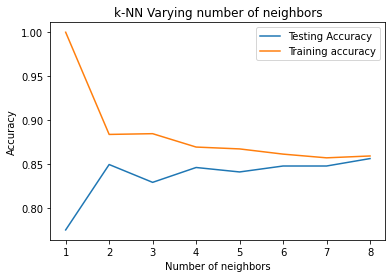

In [204]:
#Visualizing the number of neighbors with respect to the accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbor, kn_test_accuracy, label='Testing Accuracy')
plt.plot(neighbor, kn_train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [205]:
knn=KNeighborsClassifier(n_neighbors=4)


Here we can see the one of the least difference in the accuracy when number of neighbor is 4.
With increasing the number of neighbors the model tend to overfit, we chose the number of neighbor is 4.

In [206]:
knn.fit(x_train,y_train) #Fitting the model

KNeighborsClassifier(n_neighbors=4)

In [207]:
knn.score(x_train,y_train) #Accuracy

0.8695101351351351

In [208]:
#Model Prediction
kn_train_pred=knn.predict(x_train) #For train data
kn_test_pred=knn.predict(x_test)  #For test data

***Evaluation***

In [209]:
print('accuracy_score of train data : ',accuracy_score(y_train,kn_train_pred))
print('accuracy_score of test data : ',accuracy_score(y_test,kn_test_pred))

accuracy_score of train data :  0.8695101351351351
accuracy_score of test data :  0.8462837837837838


Here accuracy is in nearly 85%.

In [210]:
print('roc_auc_score of train data : ',roc_auc_score(y_train,kn_train_pred))
print('roc_auc_score of test data : ',roc_auc_score(y_test,kn_test_pred))

roc_auc_score of train data :  0.5501148293963255
roc_auc_score of test data :  0.49311023622047245


ROC_AUC_SCORE is nearly 0.5 which is similar to other model with unbalanced data.

In [211]:
#Classification Report
print('classifiction report of train data : \n',classification_report(y_train,kn_train_pred)) #For train data
print('classification report of test data : \n',classification_report(y_test,kn_test_pred)) #For test data

classifiction report of train data : 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      2032
           1       0.81      0.10      0.18       336

    accuracy                           0.87      2368
   macro avg       0.84      0.55      0.56      2368
weighted avg       0.86      0.87      0.82      2368

classification report of test data : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       508
           1       0.00      0.00      0.00        84

    accuracy                           0.85       592
   macro avg       0.43      0.49      0.46       592
weighted avg       0.73      0.85      0.79       592



Here average accuracy of f1-score is 0.46 which is very low similar to other models in unbalanced data.

In [212]:
recall_kn_tr=recall_score(y_train,kn_train_pred)
recall_kn_tr

0.10416666666666667

In [213]:
recall_kn_ts=recall_score(y_test,kn_test_pred)
recall_kn_ts

0.0

**SMOTE**

After Balancing the data.

In [214]:
neighbor=np.arange(1,9)
kn_train_accuracy_sm=np.empty(len(neighbor))
kn_test_accuracy_sm=np.empty(len(neighbor))

In [215]:
for i,k in enumerate(neighbor):
  knn_sm=KNeighborsClassifier(n_neighbors=k)
  knn_sm.fit(x_train_sm,y_train_sm) #Fitting the model
  kn_train_accuracy_sm[i]=knn_sm.score(x_train_sm,y_train_sm) #Accuracy of train data
  kn_test_accuracy_sm[i]=knn_sm.score(x_test_sm,y_test_sm) #Accuracy of test data

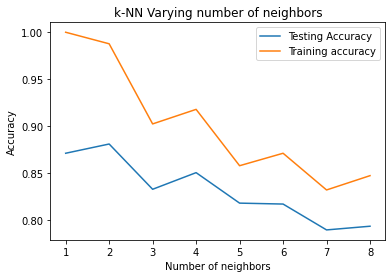

In [216]:
#Visualizing the accuracy with respect to the number of neighbours
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbor, kn_test_accuracy_sm, label='Testing Accuracy')
plt.plot(neighbor, kn_train_accuracy_sm, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Here when number of neighbors is 4,we can see the minimum differences in Accuracy thus best for prediction

In [217]:
knn_sm=KNeighborsClassifier(n_neighbors=4) #Assigning number of neighbour to 4

In [218]:
knn_sm.fit(x_train_sm,y_train_sm) #Fitting the model

KNeighborsClassifier(n_neighbors=4)

In [219]:
knn_sm.score(x_train_sm,y_train_sm)

0.9178149606299213

In [220]:
knn_sm.score(x_test_sm,y_test_sm)

0.8503937007874016

In [221]:
#Model prediction
kn_train_pred_sm=knn_sm.predict(x_train_sm) #For train data
kn_test_pred_sm=knn_sm.predict(x_test_sm)  #For test data

***Evaluation***

In [222]:
print('accuracy_score of train data : ',accuracy_score(y_train_sm,kn_train_pred_sm))
print('accuracy_score of test data : ',accuracy_score(y_test_sm,kn_test_pred_sm))

accuracy_score of train data :  0.9178149606299213
accuracy_score of test data :  0.8503937007874016


Accuracy is nearly 85%.

In [223]:
print('roc_auc_score of train data : ',roc_auc_score(y_train_sm,kn_train_pred_sm))
print('roc_auc_score of test data : ',roc_auc_score(y_test_sm,kn_test_pred_sm))

roc_auc_score of train data :  0.9184267338212653
roc_auc_score of test data :  0.8460618811208627


In [224]:
#Classification Report
print('classifiction report of train data : \n',classification_report(y_train_sm,kn_train_pred_sm)) #For train data
print('classification report of test data : \n',classification_report(y_test_sm,kn_test_pred_sm)) #For test data

classifiction report of train data : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      2053
           1       0.87      0.98      0.92      2011

    accuracy                           0.92      4064
   macro avg       0.92      0.92      0.92      4064
weighted avg       0.92      0.92      0.92      4064

classification report of test data : 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83       487
           1       0.80      0.95      0.87       529

    accuracy                           0.85      1016
   macro avg       0.87      0.85      0.85      1016
weighted avg       0.86      0.85      0.85      1016



Here average accuracy of f1-score is 0.85 which is very good with respect to other models.

In [225]:
recall_kn_tr_sm=recall_score(y_train_sm,kn_train_pred_sm)
recall_kn_tr_sm

0.9776230730979613

In [226]:
recall_kn_ts_sm=recall_score(y_test_sm,kn_test_pred_sm)
recall_kn_ts_sm

0.9508506616257089

In [227]:
#Probability prediction
test_pred_proba_sm = knn_sm.predict_proba(x_test_sm)[:,1]

In [228]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_sm, test_pred_proba_sm)

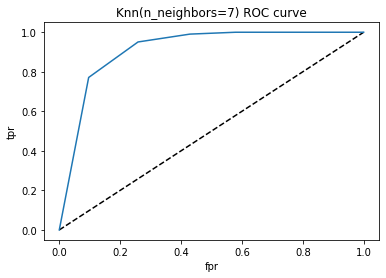

In [229]:
#Plotting ROC curve.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

# MODEL-05-NAIVE BAYES

**Implementation**

In [230]:
from sklearn.naive_bayes import GaussianNB #Importing the model
nb = GaussianNB().fit(x_train,y_train)  #Fitting the model

In [231]:
nb_train_pred = nb.predict(x_train) #Prediction on train data set
nb_test_pred = nb.predict(x_test)  #Prediction on test data set

**Evaluation**

In [232]:
print('accuracy_score of train data : ',accuracy_score(y_train,nb_train_pred))
print('accuracy_score of test data : ',accuracy_score(y_test,nb_test_pred))

accuracy_score of train data :  0.8369932432432432
accuracy_score of test data :  0.8192567567567568


In [233]:
print('roc_auc_score of train data : ',roc_auc_score(y_train,nb_train_pred))
print('roc_auc_score of test data : ',roc_auc_score(y_test,nb_test_pred))

roc_auc_score of train data :  0.5609767529058868
roc_auc_score of test data :  0.5121391076115485


In [234]:
print('classifiction report of train data : \n',classification_report(y_train,nb_train_pred))
print('classification report of test data : \n',classification_report(y_test,nb_test_pred))

classifiction report of train data : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2032
           1       0.35      0.18      0.23       336

    accuracy                           0.84      2368
   macro avg       0.61      0.56      0.57      2368
weighted avg       0.80      0.84      0.81      2368

classification report of test data : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       508
           1       0.19      0.08      0.12        84

    accuracy                           0.82       592
   macro avg       0.53      0.51      0.51       592
weighted avg       0.77      0.82      0.79       592



In [235]:
recall_nb_tr=recall_score(y_train,nb_train_pred)
recall_nb_tr

0.17559523809523808

In [236]:
recall_nb_ts=recall_score(y_test,nb_test_pred)
recall_nb_ts

0.08333333333333333

**SMOTE**

Balanced data

**Implementation**

In [237]:
nb_sm = GaussianNB().fit(x_train_sm,y_train_sm) #Fitting the model

In [238]:
#Model prediction
nb_train_pred_sm = nb_sm.predict(x_train_sm) #For train data
nb_test_pred_sm = nb_sm.predict(x_test_sm) #For test data

**Evaluation**

In [239]:
print('accuracy_score of train data : ',accuracy_score(y_train_sm,nb_train_pred_sm)) 
print('accuracy_score of test data : ',accuracy_score(y_test_sm,nb_test_pred_sm))

accuracy_score of train data :  0.6911909448818898
accuracy_score of test data :  0.6938976377952756


Here accuracy score is nearly 70% which is quite low compared to other models.

In [240]:
print('roc_auc_score of train data : ',roc_auc_score(y_train_sm,nb_train_pred_sm)) 
print('roc_auc_score of test data : ',roc_auc_score(y_test_sm,nb_test_pred_sm))

roc_auc_score of train data :  0.6916030269949763
roc_auc_score of test data :  0.6924362343424306


The roc_auc_Score is also near 0.70 which is low in compare to other model on balanced data.

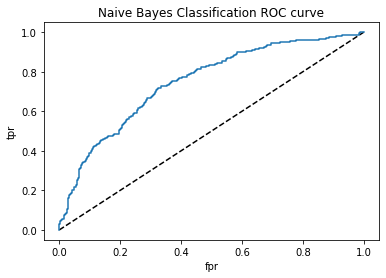

In [241]:
nb_test_pred_proba_sm = nb_sm.predict_proba(x_test_sm)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_sm, nb_test_pred_proba_sm)
#Plotting ROC curve.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes Classification')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes Classification ROC curve')
plt.show()

In [242]:
#Classification Report
print('classifiction report of train data : \n',classification_report(y_train_sm,nb_train_pred_sm)) #For train data
print('classification report of test data : \n',classification_report(y_test_sm,nb_test_pred_sm)) #For test data

classifiction report of train data : 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68      2053
           1       0.67      0.73      0.70      2011

    accuracy                           0.69      4064
   macro avg       0.69      0.69      0.69      4064
weighted avg       0.69      0.69      0.69      4064

classification report of test data : 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       487
           1       0.70      0.73      0.71       529

    accuracy                           0.69      1016
   macro avg       0.69      0.69      0.69      1016
weighted avg       0.69      0.69      0.69      1016



Here accuracy of f1-score is nearly 0.70 which is low compared to other models.

In [243]:
recall_nb_tr_sm=recall_score(y_train_sm,nb_train_pred_sm)
recall_nb_tr_sm

0.7314768771755346

In [244]:
recall_nb_ts_sm=recall_score(y_test_sm,nb_test_pred_sm)
recall_nb_ts_sm

0.7277882797731569

# MODEL-06-SUPPORT VECTOR MACHINE




**Implementation**

In [245]:
from sklearn.svm import SVC #Importing the model

In [246]:
c=[0.1,1,100] #Penalty Parameter
r=['linear','rbf'] #Kernal

In [247]:
#Implementation of model
for k in r:
 for i in c:
   svc_model=SVC(kernel=k,C=i)  #Assigning model
   svc_model.fit(x_train,y_train) #Fitting the model
   sv_train_pred=svc_model.predict(x_train) #Model prediction for train data
   sv_test_pred=svc_model.predict(x_test) #Model prediction for test data
   print(f'Classifiction report for train data for kernel={k} and C={i}\n',classification_report(sv_train_pred,y_train)) #Classificaiton Report on train data
   print(f'Classifiction report for test data for kernel={k} and C={i}\n',classification_report(sv_test_pred,y_test)) #Classification Report on test data
   print(f'ROC_AUC_Score for train data for kernal={k} and C={i}\n',roc_auc_score(y_train,sv_train_pred)) #ROC_AUC_SCORE of train data
   print(f'ROC_AUC_Score for test data for kernal={k} and C={i}\n',roc_auc_score(y_test,sv_test_pred)) #ROC_AUC_SCORE of test data
   print(f'Recall_Score for train data for kernal={k} and C={i}\n',recall_score(y_train,sv_train_pred)) #ROC_AUC_SCORE of train data
   print(f'Recall_Score for test data for kernal={k} and C={i}\n',recall_score(y_test,sv_test_pred)) #ROC_AUC_SCORE of test data

Classifiction report for train data for kernel=linear and C=0.1
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      2368
           1       0.00      0.00      0.00         0

    accuracy                           0.86      2368
   macro avg       0.50      0.43      0.46      2368
weighted avg       1.00      0.86      0.92      2368

Classifiction report for test data for kernel=linear and C=0.1
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       592
           1       0.00      0.00      0.00         0

    accuracy                           0.86       592
   macro avg       0.50      0.43      0.46       592
weighted avg       1.00      0.86      0.92       592

ROC_AUC_Score for train data for kernal=linear and C=0.1
 0.5
ROC_AUC_Score for test data for kernal=linear and C=0.1
 0.5
Recall_Score for train data for kernal=linear and C=0.1
 0.0
Recall_Score for test data for ke

Here since the model is unbalanced thus the average f-1-score is less than 0.5 which show model does not work well in unbalanced data.

**SMOTE**

Balanced data

In [ ]:
#Model implementation of balanced data
for k in r:
 for i in c:
   svc_model_sm=SVC(kernel=k,C=i)
   svc_model_sm.fit(x_train_sm,y_train_sm) #Fitting the model
   sv_train_pred_sm=svc_model_sm.predict(x_train_sm) #Prediction of model on train data
   sv_test_pred_sm=svc_model_sm.predict(x_test_sm) #Prediction of model on test data
   print(f'Classifiction report for train data for kernel={k} and C={i}\n',classification_report(sv_train_pred_sm,y_train_sm)) #Classification Report on train data
   print(f'Classifiction report for test data for kernel={k} and C={i}\n',classification_report(sv_test_pred_sm,y_test_sm)) #Classification Report on test data
   print(f'ROC_AUC_Score for train data for kernal={k} and C={i}\n',roc_auc_score(y_train_sm,sv_train_pred_sm)) #ROC_AUC_SCORE of train data
   print(f'ROC_AUC_Score for test data for kernal={k} and C={i}\n',roc_auc_score(y_test_sm,sv_test_pred_sm)) #ROC_AUC_SCORE of test data
   print(f'Recall_Score for train data for kernal={k} and C={i}\n',recall_score(y_train_sm,sv_train_pred_sm)) #Recall Score of train data
   print(f'Recall_Score for test data for kernal={k} and C={i}\n',recall_score(y_test_sm,sv_test_pred_sm)) #Recall Score of test data

For kernal linear and c=1,the model getting highest f1-score nearly 0.73.
Thus we ll take that parameter.

In [ ]:
svc_model_fin_sm=SVC(kernel='rbf',C=1)
svc_model_fin_sm.fit(x_train_sm,y_train_sm) #Fitting the model
sv_train_pred_sm=svc_model_fin_sm.predict(x_train_sm) #Prediction of model on train data
sv_test_pred_sm=svc_model_fin_sm.predict(x_test_sm) #Prediction of model on test data

In [ ]:
recall_sv_tr_sm=recall_score(y_train_sm,sv_train_pred_sm)
recall_sv_tr_sm

In [ ]:
recall_sv_ts_sm=recall_score(y_test_sm,sv_test_pred_sm)
recall_sv_ts_sm

In [ ]:
#implementing the model on k=linear and C=1
svc_model_sm=SVC(kernel='linear',C=1)
svc_model_sm.fit(x_train_sm,y_train_sm)

# *Comparison*

Text(0, 0.5, 'RECALL_SCORE')

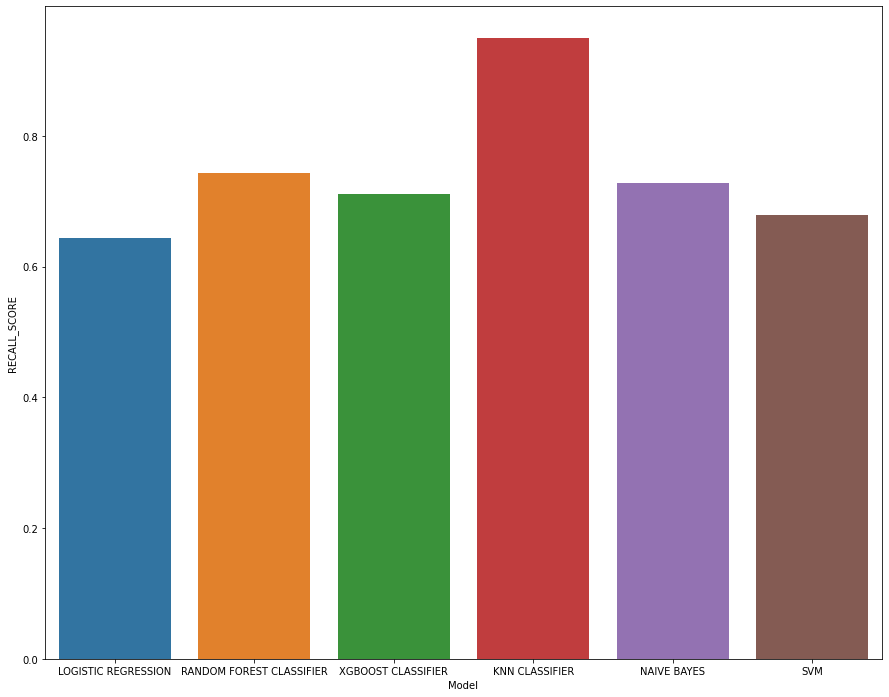

Text(0, 0.5, 'RECALL_SCORE')

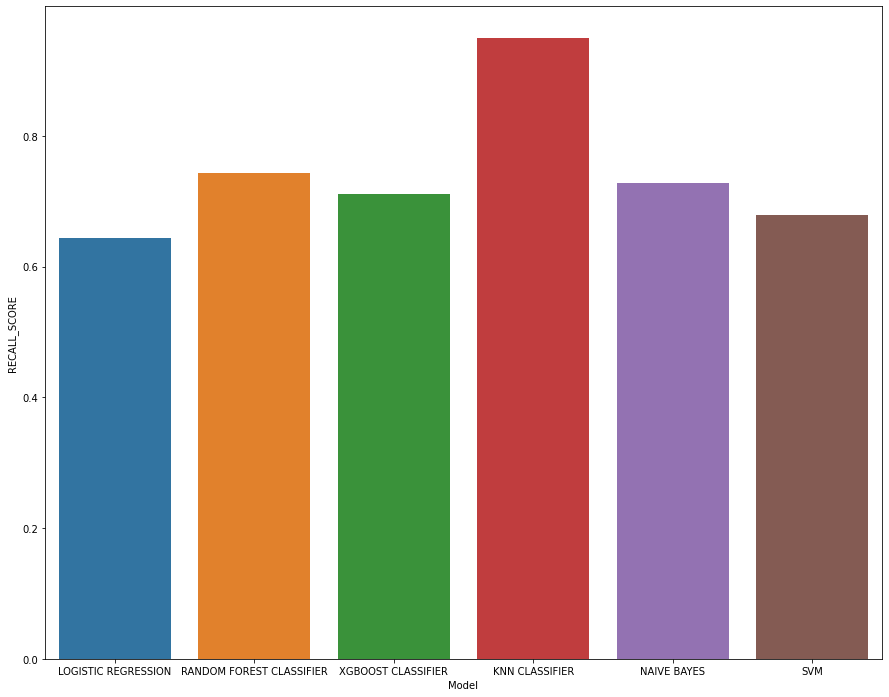

In [253]:
model=['LOGISTIC REGRESSION','RANDOM FOREST CLASSIFIER','XGBOOST CLASSIFIER','KNN CLASSIFIER','NAIVE BAYES','SVM']
acc=[recall_lr_ts_sm,recall_rf_ts_sm,recall_xg_ts_sm,recall_kn_ts_sm,recall_nb_ts_sm,recall_sv_ts_sm]
plt.figure(figsize=(15,12))
sns.barplot(x=model,y=acc)
plt.xlabel('Model')
plt.ylabel('RECALL_SCORE')

# *Conclusion*

    1-From the above chart of recall score of various model,we can conclude that KNN Classifier hold the maximum recall score which makes it most desirelable while logistic regression gives the minimum recall score.

    2-While Logistic Regression Model having the least recall score.

    3-Random Forest Classifier and XGBoost Classifier takes more time in training the model.

    4-From analysing the Feature Importance, we can say that Sex and Age play a major role in the determining the results.

# *Summary*

For analysis of data of Cardiovascular Risk Prediction, we have followed the following steps-

    1-Data Import
    2-Removing non relevant featues like Id,Education
    3-Data exploration then removing not impacting features like Prevalent Stroke,BPMeds,Smoking etc
    4-Removing collinerar features like SysBP.
    5-Data cleaning (removing null values,outliers)
    6-Converting unbalanced data into balanced using SMOTE
    7-Applying different models and evaluating them on both Unbalanced and Balanced Data
    8-Evaluation of every model
    9-Comparison with respect to Recall Score
    10-Conclusion 